In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
# import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import gzip
import json
import string

import nltk # imports the natural language toolkit
import plotly
from wordcloud import WordCloud

from collections import Counter
from nltk.util import ngrams
import re

In [2]:
data = pd.read_excel(r'C:\Users\dcalle.MATONE\Downloads\WRI_Policy_Tags (1).xlsx', sheet_name = None)
df = None

if isinstance(data, dict):
    for key, value in data.items():
        if not isinstance(df,pd.DataFrame):
            df = value
        else:
            df = df.append(value)
else:
    df = data
df.head()

,Document,Text,Incentive Instrument,Land Use Type,Category,Unique Policy #,Key words,relevant sentences,Key Words
0,2019 ACUERDO por el que se emiten los Lineamie...,Generar empleo y garantizara la población camp...,"Direct payment (PES), Credit, Technical assist...","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),"insumo, crédito, capacitación, asistencia técnica",NaN,NaN
1,2019 ACUERDO por el que se emiten los Lineamie...,\nEl Programa incentivará a los sujetos agrari...,"Direct payment (PES), Credit, Technical assist...","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),incentivar,NaN,NaN
2,2019 ACUERDO por el que se emiten los Lineamie...,Los sujetos agrarios beneficiados por el progr...,"Supplies, Technical assistance","Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),"apoyo económico, apoyos en especie, insumos, h...",NaN,NaN
3,2019 ACUERDO por el que se emiten los Lineamie...,"El sujeto de derecho, recibirá un apoyo económ...",Direct payment (PES),"Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),pesos,NaN,NaN
4,2019 ACUERDO por el que se emiten los Lineamie...,"El sujeto de derecho, recibirá en especie las ...",Supplies,"Forest, Agriculture (Crop)",Incentive,1 (Sembrando Vida),recibir,NaN,NaN


Text(0.5, 1.0, 'Histogram of number of words per sentence')

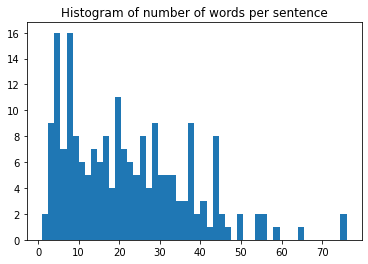

In [3]:
sentences = df["relevant sentences"].apply(lambda x: x.split(";") if isinstance(x,str) else x)
sentence = []

for elem in sentences:
    if isinstance(elem,float) or len(elem) == 0:
        continue
    elif isinstance(elem,list):
        for i in elem:
            if len(i.strip()) == 0:
                continue
            else:
                sentence.append(i.strip())
    else:
        if len(elem.strip()) == 0:
            continue
        else:
            sentence.append(elem.strip())

sentence
words_per_sentence = [len(x.split(" ")) for x in sentence]
plt.hist(words_per_sentence, bins = 50)
plt.title("Histogram of number of words per sentence")

In [4]:
noise_words = []
stopwords_corpus = nltk.corpus.stopwords
sp_stop_words = stopwords_corpus.words('spanish')
noise_words.extend(sp_stop_words)
print(len(noise_words))

if "no" in noise_words:
    noise_words.remove("no")

313


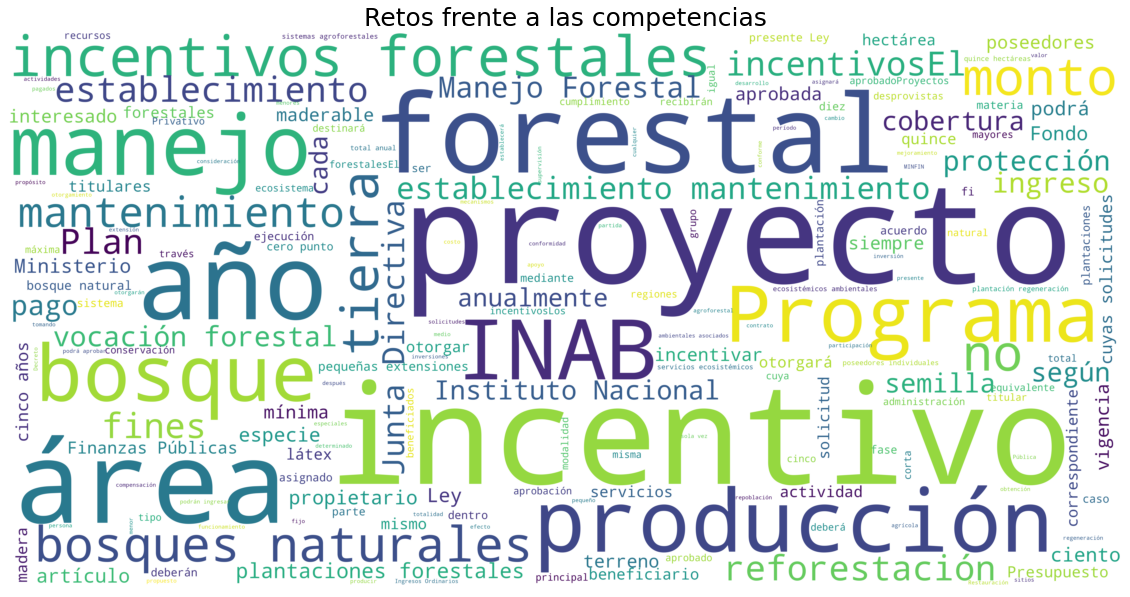

In [5]:
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white", #,mask=wave_mask
                          scale = 10,width=800, height=400,stopwords=noise_words,normalize_plurals= True).generate(''.join(sentence))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Retos frente a las competencias", fontsize=25)
plt.axis("off")
plt.show()

In [6]:
def top_k_ngrams(word_tokens,n,k):
    
    ## Getting them as n-grams
    n_gram_list = list(ngrams(word_tokens, n))

    ### Getting each n-gram as a separate string
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

tokenized_words = nltk.word_tokenize(''.join(sentence))
word_freq = Counter(tokenized_words)
# word_freq.most_common(20)
# list(ngrams(tokenized_words, 3))

word_tokens_clean = [re.findall(r"[a-zA-Z]+",each) for each in tokenized_words if each.lower() not in noise_words and len(each.lower()) > 1]
word_tokens_clean = [each[0].lower() for each in word_tokens_clean if len(each)>0]
top_k_ngrams(word_tokens_clean, 4, 20)

[('cuyas solicitudes ingreso programa', 6), ('solicitudes ingreso programa aprobadas', 6), ('ingreso programa aprobadas a', 6), ('manejo bosques naturales fines', 5), ('bosques naturales fines producci', 5), ('instituto nacional bosques inab', 5), ('programa aprobadas a proyectos', 5), ('incentivos forestales poseedores peque', 4), ('forestales poseedores peque extensiones', 4), ('establecimiento mantenimiento plantaciones forestales', 4), ('junta directiva instituto nacional', 4), ('a establecimiento cinco a', 4), ('a mantenimiento seg plan', 4), ('mantenimiento seg plan manejo', 4), ('seg plan manejo forestal', 4), ('programa incentivos forestales poseedores', 3), ('poseedores peque extensiones tierra', 3), ('poseedores peque extensiones tierras', 3), ('peque extensiones tierras vocaci', 3), ('extensiones tierras vocaci forestal', 3)]


In [ ]:
nltk.download('averaged_perceptron_tagger')

def ExtractInteresting(sentence, match = ["NN","CD"]):
    words = nltk.word_tokenize(sentence)
    interesting = [k for k,v in nltk.pos_tag(words) if v in match]
    return(interesting)

def next_word(sentence):

    items = list()
    word_tokens = nltk.word_tokenize(sentence)
    
    if "good" not in word_tokens: return ""
    
    while "good" in word_tokens:
        idx = word_tokens.index("good")
        pos_words = [k for k,v in nltk.pos_tag(word_tokens[idx:]) if v in ["NN","CD"]]
        if len(pos_words) > 0: items.append(pos_words[0])
        del word_tokens[idx]
    
    return items
    
def prev_word(sentence):
    items = list()
    word_tokens = nltk.word_tokenize(sentence)
    
    if "good" not in word_tokens: return ""
    
    while "good" in word_tokens:
        idx = word_tokens.index("good")
        pos_words = [k for k,v in nltk.pos_tag(word_tokens[:idx]) if v in ["NN","CD"]]
        if len(pos_words) > 0: items.append(pos_words[-1])      #take the last element since it is the one before "good"
        del word_tokens[idx]
    
    return items